# Numerical Methods

## Interpolation and curve fitting

### Exercise solutions

In [26]:
# some imports we will make at the start of every notebook
# later notebooks may add to this with specific SciPy modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import scipy.interpolate as si

### <span style="color:blue">Exercise 1: Picewise-linear Lagrange interpolant </span>

What are the Lagrange basis polynomials when $N=1$?

Evaluate by *pen and paper* the linear approximation $L_1(x)$ (i.e. the Lagrange polynomial of degree 1) which passes through the two points $(0.0,0.1),(1.0,0.9)$.

Notice that this method is just a glorified approach to obtain the equation of a line you are familar with: $y=mx+c$.

Here we have $N=1$ and $N+1=2$ data points: $\{(x_0,y_0),(x_1,y_1)\}$.

The Lagrange basis polynomials are then

$$ \ell_0(x) = \frac{x - x_1}{x_0-x_1}, \;\;\;\;\;\;\;\;  \ell_1(x) = \frac{x - x_0}{x_1-x_0}, $$

and the Lagrange polynomial is

$$ y = L(x) = \ell_0(x)\,y_0 + \ell_1(x)\,y_1 = \frac{x - x_1}{x_0-x_1}\,y_0 + \frac{x - x_0}{x_1-x_0}\,y_1, $$

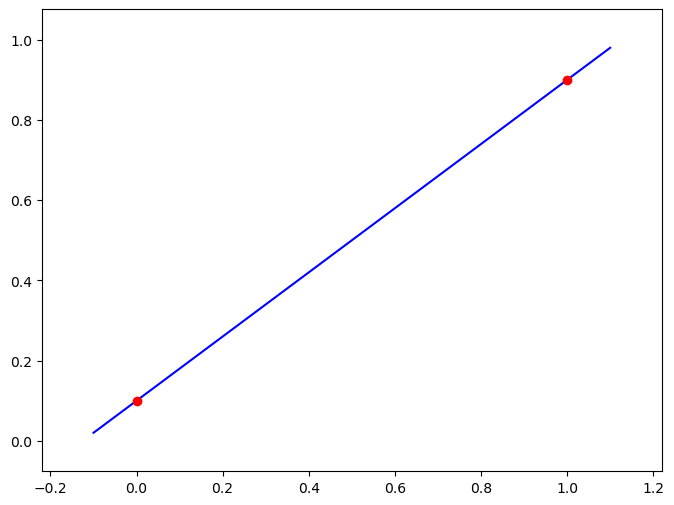

In [27]:
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x0 = 0
y0 = 0.1
x1 = 1
y1 = 0.9

x = np.linspace(-0.1, 1.1, 100)

y = (x-x1)/(x0-x1) * y0 + (x-x0)/(x1-x0) * y1

ax1.plot(x, y, 'b')

ax1.plot(x0,y0,'ro')
ax1.plot(x1,y1,'ro')

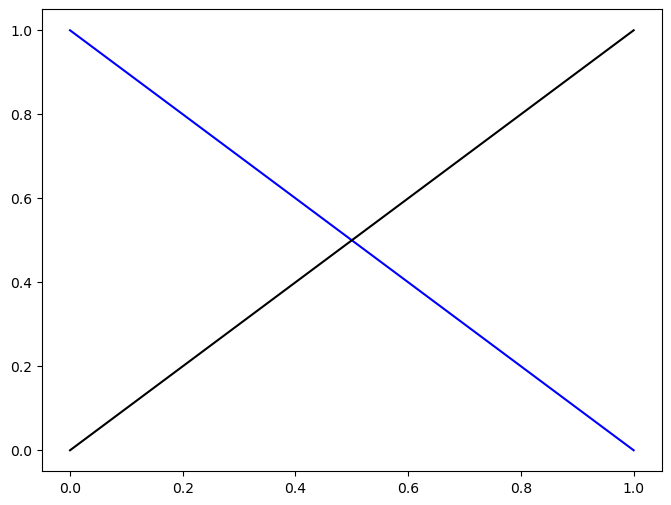

In [28]:
# let's also plot l1 and l2

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

x0 = 0
y0 = 0.1
x1 = 1
y1 = 0.9

x = np.linspace(0, 1, 100)

l0 = (x-x1)/(x0-x1) 
l1 = (x-x0)/(x1-x0)

ax1.plot(x, l0, 'b')
ax1.plot(x,l1,'k')

Try repeating this for the case where $N=2$

### <span style="color:blue">Exercise 2: Approximating a function </span>

Sample the function $y(x)=x^3$ at the points $x=(1,2,3)$.  

Write some code to construct the Lagrange polynomials $L_0$ (the constant interpolant going through the $x=2$ data point only), $L_1$ (the linear interpolant going through the $x=1$ and $x=3$ points) and $L_2$ (the quadratic interpolant going through all three points). Plot the resulting polynomials along with the error compared to the original exact function.

**Tip**: Using the function [fill_between](http://matplotlib.org/examples/pylab_examples/fill_between_demo.html) provides a nice way of illustrating the difference between graphs.

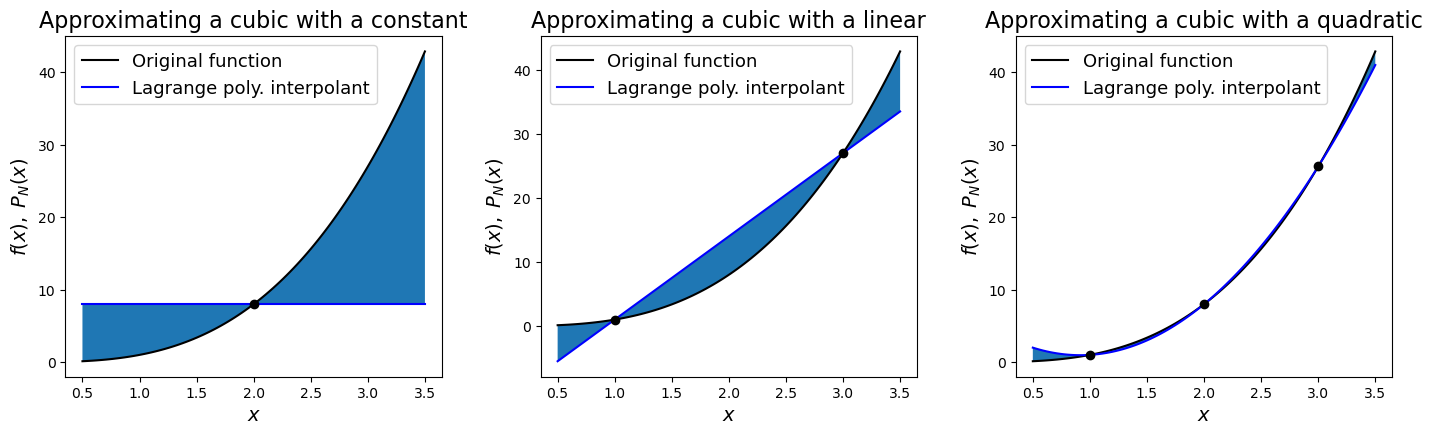

In [29]:
# this is the function we are going to approximate with low degree polynomials
def func_x3(x):
    return x**3

# as we will plot our approximation several times let's write a small function to do this
def plot_approximation(f, xi, ax):
    # Relatively fine x points for plotting our functions
    x = np.linspace(0.5, 3.5, 100)
    # Plot the original function
    ax.plot(x, f(x), 'k', label = 'Original function')

    # construct and plot the Lagrange polynomial
    lp = si.lagrange(xi, f(xi))
    # evaluate and plot the Lagrange polynomial at the x points
    ax.plot(x, lp(x), 'b', label = 'Lagrange poly. interpolant')

    # shade the region between the two to emphasise the difference
    ax.fill_between(x, f(x), lp(x))
    
    # add some axis labels
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$f(x), \; P_N(x)$', fontsize=14)

    # and add on top the interpolation points
    ax.plot(xi, f(xi), 'ko')
    
    # and a legend
    ax.legend(loc='best', fontsize=13)


# set up our figs for plotting - we want three subplots arranged in a 1x3 grid
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
# add some padding otherwise axes the labels can overlap with the next subplot
fig.tight_layout(w_pad=4) 

# L0
plot_approximation(func_x3, np.array([2., ]), ax1)
ax1.set_title('Approximating a cubic with a constant', fontsize=16)

# L1
plot_approximation(func_x3, np.array([1., 3.]), ax2)
ax2.set_title('Approximating a cubic with a linear', fontsize=16)

# L2
plot_approximation(func_x3, np.array([1., 2., 3.]), ax3)
ax3.set_title('Approximating a cubic with a quadratic', fontsize=16);

### <span style="color:blue">Exercise 3: Squared error calculation</span>

As described in the docs ([numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the square of the difference between the data provided and the polynomial,

$$E = \sum_{i=0}^{N} (p(x_i) - y_i)^2,$$

where $p(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.

Write a Python function that evaluates the squared error, $E$, and use this function to evaluate the error for each of the polynomials calculated above. <span style="color:green">Tip: Try to pass the function *p* in as an argument to your error calculation function. One of the great features of Python is that it is easy to pass in functions as arguments.</span>

Why is the square of the difference used? 

**Note on Python syntax:** In Python, functions are what is termed "first-class objects." This means you can pass a function (like `p1` or `lp`) into another function as an argument, just like you would with a number or a string.

```python
def my_error_function(poly_func, x_data, y_data):
    # inside here, 'poly_func' behaves exactly like the function you passed in
    prediction = poly_func(x_data)
    ...
```
    

In [30]:
# create the polynomials using code from the lecture

# consider the above example data again
xi=np.array([0.5,2.0,4.0,5.0,7.0,9.0])
yi=np.array([0.5,0.4,0.3,0.1,0.9,0.8])

# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=np.polyfit(xi, yi, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = np.poly1d(poly_coeffs)

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(xi, yi, 1)
p1 = np.poly1d(poly_coeffs)

# Quadratic
poly_coeffs=np.polyfit(xi, yi, 2)
p2 = np.poly1d(poly_coeffs)

# Cubic
poly_coeffs=np.polyfit(xi, yi, 3)
p3 = np.poly1d(poly_coeffs)

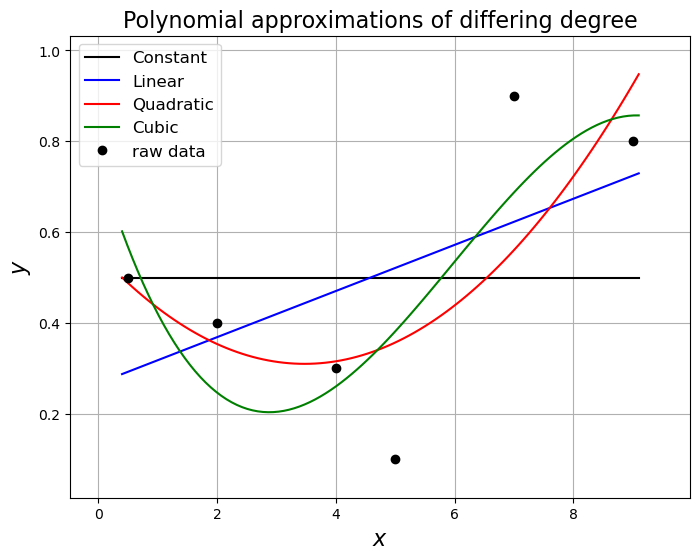

In [31]:
# and plot again
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)
    
    
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

ax1.plot(x, p0(x), 'k', label='Constant')
ax1.plot(x, p1(x), 'b', label='Linear')
ax1.plot(x, p2(x), 'r', label='Quadratic')
ax1.plot(x, p3(x), 'g', label='Cubic')

# Overlay raw data
plot_raw_data(xi, yi, ax1)

ax1.legend(loc='best', fontsize = 12)
ax1.set_title('Polynomial approximations of differing degree', fontsize=16);

In [32]:
# we use the square of the difference to ensure each contribution
# to the total error is positive, otherwise errors of different signs
# could/would cancel out giving a false estimate of how good our approximation is


def sqr_error(p, xi, yi):
    """"function to evaluate the sum of square of errors"""
    # first compute the square of the differences
    diff2 = (p(xi)-yi)**2
    # and return their sum
    return diff2.sum()


print(sqr_error(p0, xi, yi))
print(sqr_error(p1, xi, yi))
print(sqr_error(p2, xi, yi))
print(sqr_error(p3, xi, yi))

0.4600000000000001
0.33298899237933954
0.19947824214254956
0.15730343662323765


### <span style="color:blue">Exercise 4: Degree of approximation </span>

Extend the example above by fitting and plotting polynomials of increasing degree past cubic. At what *degree* does the resulting polynomial approximation equate to the Lagrange interpolant?

Why does this make sense? 

<span style="color:green">Hint: think about the number of free parameters in a polynomial, and the amount of data you have.</span>

In [33]:
print("Number of points to fit: ", np.size(xi))
# in this example we have 6 pieces of information, to fit a polynomial
# that exactly goes through these points we need 6 unknowns, or free 
# parameters, to choose in the polynomial.  [Too few and we won't be able
# to fit the data exaclty, and too many would just be a waste.  Cf. over-
# and under-determined systems.]
# A 5th order polynomial has 6 free parameters (all the powers up to 5,
# including 0).
# So calling polyfit to fit a polynomial of degree 5 (size(x)-1) should
# fit the data exactly (repeat below with size(x)-2 etc, and size(x) and 
# above to convince yourself of this).
# Let's check the errors up to this point:

xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

print('poly_coeffs = \n{}'.format(poly_coeffs))

# and now compute the errors
for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    print('square of the difference between the data and the '
          'polynomial of degree {0:1d} = {1:.8e}'.format(i, sqr_error(p, xi, yi)))
    


Number of points to fit:  6
poly_coeffs = 
[[ 0.5         0.          0.          0.          0.          0.        ]
 [ 0.0508044   0.26714649  0.          0.          0.          0.        ]
 [ 0.02013603 -0.13983999  0.55279339  0.          0.          0.        ]
 [-0.00552147  0.09889271 -0.43193108  0.75909819  0.          0.        ]
 [-0.00420655  0.07403681 -0.38492428  0.59251888  0.27906056  0.        ]
 [-0.00301599  0.06536037 -0.49614427  1.59623195 -2.08266478  1.20030166]]
square of the difference between the data and the polynomial of degree 0 = 4.60000000e-01
square of the difference between the data and the polynomial of degree 1 = 3.32988992e-01
square of the difference between the data and the polynomial of degree 2 = 1.99478242e-01
square of the difference between the data and the polynomial of degree 3 = 1.57303437e-01
square of the difference between the data and the polynomial of degree 4 = 4.69232378e-02
square of the difference between the data and the polyno

### <span style="color:blue">Exercise 5: Extrapolation </span>

Recreate the plots in the example above for different degrees of polynomial, setting the x-range from -2.0 to 11.0. What do you notice about extrapolation when you use higher degree polynomials.

Text(0.5, 1.0, 'Extrapolation example - narrower interval')

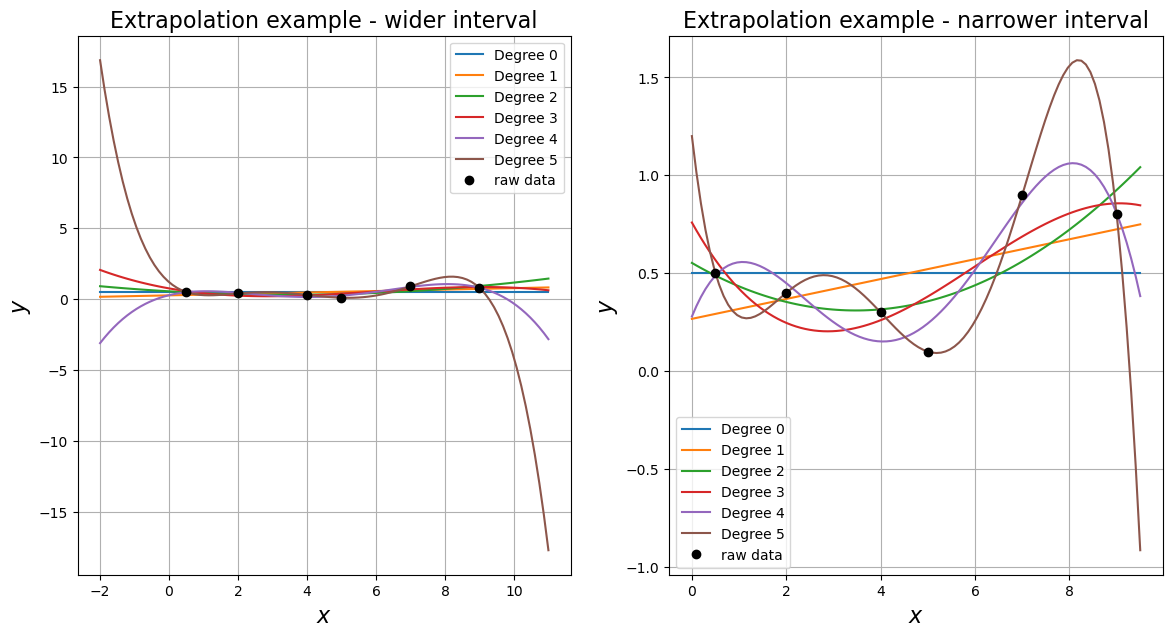

In [34]:
# consider the above example data again
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

# plot over a couple of different x ranges
x1 = np.linspace(-2., 11., 100)
x2 = np.linspace(0., 9.5, 100)

# set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax1.plot(x1, p(x1), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax1)
# Add a legend
ax1.legend(loc='best')
ax1.set_title('Extrapolation example - wider interval', fontsize=16)

# NB. if you set the limits of the x data to numpy.linspace(0., 9.5, 100)
# and replot this will result in you zooming in on the data to better see
# how each polynomial fits the data, but less clearly shows the major
# problem with extrapolation.

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax2.plot(x2, p(x2), label='Degree %i' % i)

# Overlay raw data
plot_raw_data(xi, yi, ax2)
# Add a legend
ax2.legend(loc='best')
ax2.set_title('Extrapolation example - narrower interval', fontsize=16)

### <span style="color:blue">Exercise 6: Submarine landslide size in the North Atlantic </span>

Open the data file [Length-Width.dat](data/Length-Width.dat) (located in the data directory) giving the lengths and widths of submarine landslides in the North Atlantic basin [from [Huhnerbach & Masson, 2004](http://www.sciencedirect.com/science/article/pii/S0025322704002774), Fig. 7].  Fit a linear best fit line using polyfit and try to recreate the image below.

<span style="color:green">Hint: You will need to take the log of the data before fitting a line to it. </span>

!["Cloud of point data for submarine landslide widths and depths in the North Atlantic, and a correspondong best (linear) curve fit."](images/Width-Length.png)


Reference: [V. Huhnerbach, D.G. Masson, Landslides in the North Atlantic and its adjacent seas:
an analysis of their morphology, setting and behaviour, Marine Geology 213 (2004) 343 – 362.](http://www.sciencedirect.com/science/article/pii/S0025322704002774)

Lagrange polynomial coefficients = [1.0266104  0.37698383]
R squared value calculated from Lagrange polynomial fit to the data in log-log space = 0.5653751967433511

Linear regression ... slope, intercept, r_value = 1.02661040, 0.37698383, 0.75191435
r_value squared = 0.56537520


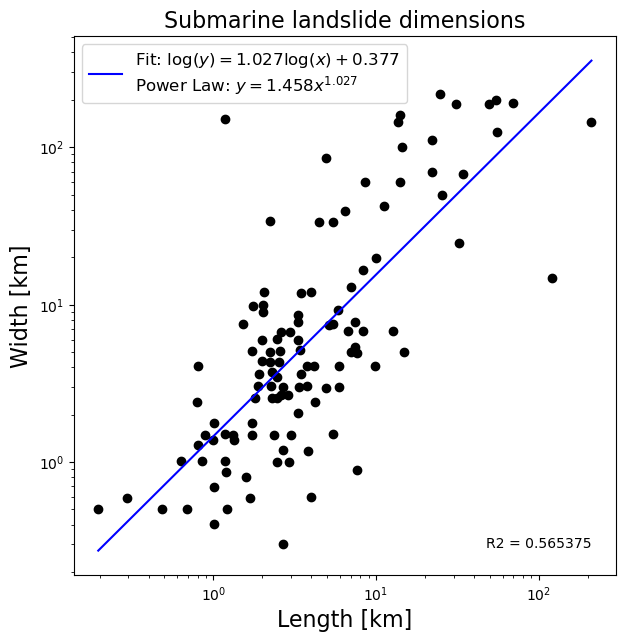

In [35]:
# this solution includes some statistical measures of the fit (R-squared value)
# you can just ignore this.

# the code here is quite complicated, so don't worry too much if you don't follow all of it.

import scipy.stats as ss

file = open("data/Length-Width.dat", 'r')

xi = []
yi = []
for line in file:  # note that this could also be done using np.loadtext
    xi.append(float(line.split()[0]))
    yi.append(float(line.split()[1]))
xi = np.array(xi)
yi = np.array(yi)

# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))
# plot the raw data
ax1.loglog(xi, yi, 'ko')

# fit a linear line to the log of the data using numpy.polyfit
logxi = np.log(xi)
logyi = np.log(yi)
poly_coeffs = np.polyfit(logxi, logyi, 1)
# Construct the corresponding polynomial function from these coefficients
p1 = np.poly1d(poly_coeffs)
# print the polynomial coefficients to compare with regression
print('Lagrange polynomial coefficients = {}'.format(poly_coeffs))

# calculate and print an R-squared value for this fit using the mathematical
# definition from https://en.wikipedia.org/wiki/Coefficient_of_determination
SS_res = sqr_error(p1, logxi, logyi)
SS_tot = np.sum((np.mean(logyi) - logyi)**2)
r2 = 1. - SS_res/SS_tot
print('R squared value calculated from Lagrange polynomial fit to the data in log-log space = {}\n'.format(r2))

# Plot the linear line in log-log space ... only need two points to plot a linear
x_plot = np.linspace(min(xi), max(xi), 2)
# Calculate the power law y = A * x^m
m = poly_coeffs[0]
c = poly_coeffs[1]
A = np.exp(c)
y_plot = A * (x_plot**m)
ax1.loglog(x_plot, y_plot, 'b', label=(f'Fit: $\log(y) = {m:.3f}\log(x) + {c:.3f}$\n'
             f'Power Law: $y = {A:.3f}x^{{{m:.3f}}}$'))
ax1.legend(loc='best', fontsize=12)

# check values computed above against scipy's linear regression
slope, intercept, r_value, p_value, std_err = ss.linregress(logxi, logyi)
print('Linear regression ... slope, intercept, r_value = {0:.8f}, {1:.8f}, {2:.8f}'\
      .format(slope, intercept, r_value))
print('r_value squared = {:.8f}'.format(r_value**2))


ax1.set_title('Submarine landslide dimensions', fontsize=16)
ax1.set_xlabel('Length [km]', fontsize=16)
ax1.set_ylabel('Width [km]', fontsize=16)

ax1.text(0.76, 0.05, 'R2 = %.6f' % r2, transform=ax1.transAxes);

$m$ is close to 1, and so the relationship between length and width is approximately linear.

#### Final Interpretation: Back to Linear Space

While we performed our analysis in log-log space to find the scaling relationship, it is often helpful to visualize the results in linear space. Because our calculated slope $m$ is very close to $1$ ($m \approx 1.027$), the "power law" $y = Ax^{1.027}$ should look almost like a straight line. In Earth Science, an exponent of $1$ is called isometric scaling, meaning the width of the landslide is directly proportional to its length regardless of size.

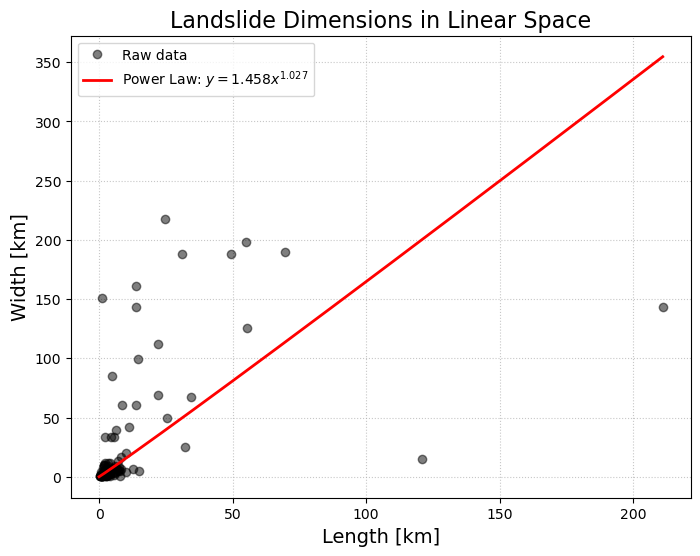

The exponent m = 1.027 is very close to 1.
This indicates that landslides scale almost linearly.


In [36]:
# Create a figure for linear (normal) space
fig, ax2 = plt.subplots(1, 1, figsize=(8, 6))

# Plot the raw data in linear space
ax2.plot(xi, yi, 'ko', alpha=0.5, label='Raw data')

# Calculate the power law y = A * x^m
m = poly_coeffs[0]
c = poly_coeffs[1]
A = np.exp(c)

# Create a smooth range of x values for the curve
x_linear = np.linspace(0, max(xi), 200)
y_linear = A * (x_linear**m)

# Plot the resulting power law
ax2.plot(x_linear, y_linear, 'r-', linewidth=2, 
         label=f'Power Law: $y = {A:.3f}x^{{{m:.3f}}}$')

# Formatting
ax2.set_title('Landslide Dimensions in Linear Space', fontsize=16)
ax2.set_xlabel('Length [km]', fontsize=14)
ax2.set_ylabel('Width [km]', fontsize=14)
ax2.grid(True, linestyle=':', alpha=0.7)
ax2.legend(loc='best')

plt.show()

print(f"The exponent m = {m:.3f} is very close to 1.")
print("This indicates that landslides scale almost linearly.")